In [133]:
#For this project we use the libraries like numpy, pandas, matplotlib,seaborn
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile


In [163]:
# Dataset selection
# We will use the Student Performance dataset, which contains columns like G1, G2,G3(Grades for three terms), study time(hours spent studying weekly), sex(gender:male/female). This dataset is taken from (https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip) and from a provided source.
#path to zipfile
file_path = 'C:/Users/ganga/Downloads/student.zip'
# Open cvsfile and load specific csv file into data frame
with zipfile.ZipFile(file_path,'r') as zep_ref:
    #list files inside the zip archive
    zep_ref.printdir()
    #specifying the csvfile we want to read
    student_file = 'student-mat.csv'  # This the specific csv file in zip archive
    #read the csvfile directly from the zip archive
    with zep_ref.open(student_file) as my_file:
     df = pd.read_csv(my_file,sep=';')

File Name                                             Modified             Size
student-mat.csv                                2012-04-12 11:38:38        56993
student-por.csv                                2015-07-20 10:18:42        93220
student-merge.R                                2015-07-20 11:38:52          269
student.txt                                    2015-07-20 11:39:16         3206


In [165]:
# Data loading
# Loading the dataset using pandas library
print(df.head()) # displaying the first few rows using head() function

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [168]:
df.info() # Checking the information of a Dataframe which includes dtypes,non-null values,columns,index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [169]:
# Data Exploration
df.isnull().sum()   #checking the missing values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [170]:
# Displaying column datatypes using dtypes 
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [171]:
# Checking or understanding the size of the dataset
print("Number of rows and columns in the dataset:", df.shape)

Number of rows and columns in the dataset: (395, 33)


In [172]:
# Data cleaning
# Removing rows with missing values
print(df.dropna())

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [173]:
# Removing duplicate entries 
df.drop_duplicates()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [174]:
# Data analysis
df['G3'] # Displaying the column math(G3)

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [175]:
# Finding the average score in math(G3)
average_score = df['G3'].mean()
print(f"The average score in math(G3) is {average_score:.2f}")

The average score in math(G3) is 10.42


In [177]:
# Finding the number of students scored above 15 in their final grade
highest_score = df['G3'] > 15
print(highest_score)
students_above_15 = np.sum(df['G3']>15)
print(f"Number of students scored above 15 in their final grade is :{students_above_15:.2F}")  # Output: 0

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391     True
392    False
393    False
394    False
Name: G3, Length: 395, dtype: bool
Number of students scored above 15 in their final grade is :40.00


The correlation between study time and final grade (G3) is 0.10


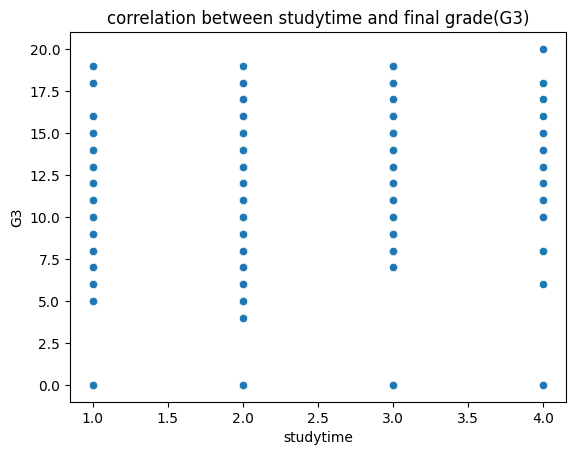

In [178]:
# Calculate the correlation between study time and final grade (G3)
correlation = df['studytime'].corr(df['G3'])
print(f"The correlation between study time and final grade (G3) is {correlation:.2f}")

# vizualizing the correlation between study time and final grade
sns.scatterplot(x='studytime', y='G3', data=df)
plt.title("correlation between studytime and final grade(G3)")
plt.xlabel('studytime')
plt.ylabel('G3')
plt.show()

The average final grade of gender is sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


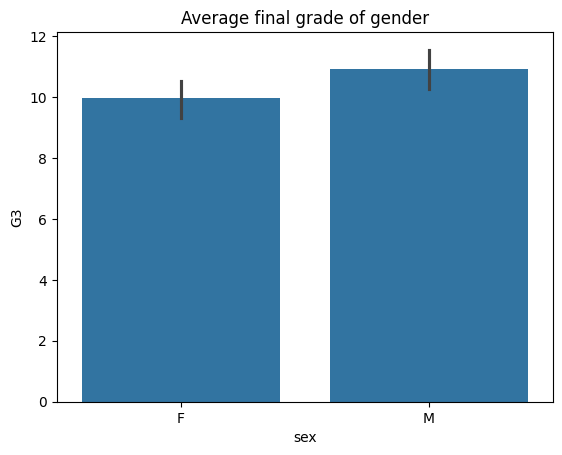

In [181]:
# Calculating the average final grade(G3) for gender
average_finalgrade_gender = df.groupby('sex')['G3'].mean()
print("The average final grade of gender is",average_finalgrade_gender)
sns.barplot(x='sex',y='G3', data=df,estimator=np.mean)
plt.title("Average final grade of gender")
plt.xlabel('sex')
plt.ylabel('G3')
plt.show()

Number of bins: 19


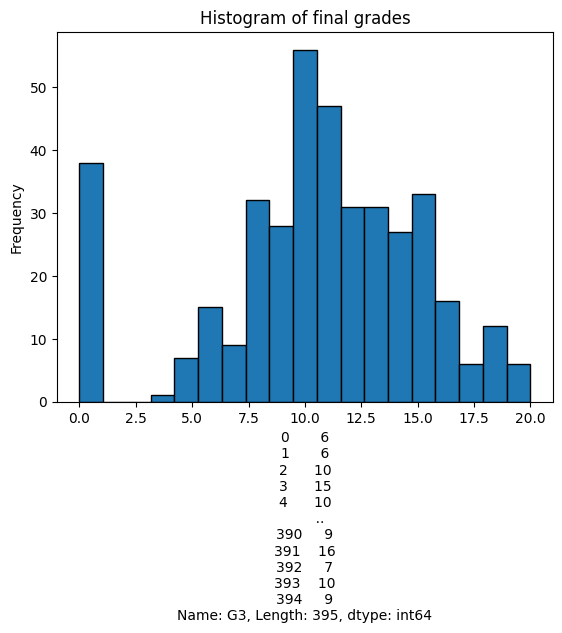

In [192]:
# Data Vizualization
# Calculate number of bins using square root rule
num_bins = int(np.sqrt(len(df['G3'])))
print("Number of bins:",num_bins)
plt.hist(df['G3'], bins=19, edgecolor='black')   # 1.Plotting histogram of final Grades
plt.title("Histogram of final grades")
plt.xlabel(df['G3'])
plt.ylabel("Frequency")
plt.show()

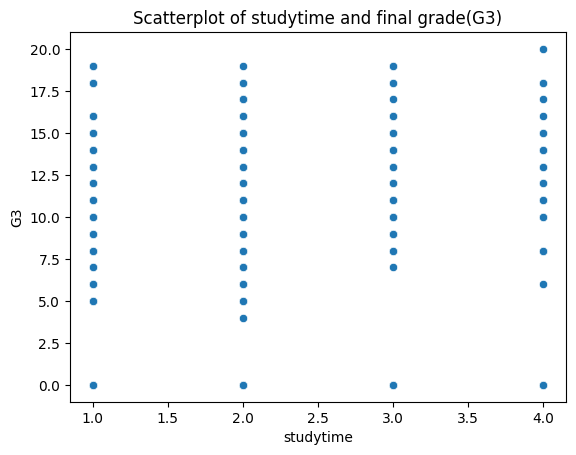

In [193]:
# 2.Creating a scatterplot between studytime and finalgrade(G3)
sns.scatterplot(x='studytime',y='G3',data=df)
plt.title("Scatterplot of studytime and final grade(G3)")
plt.xlabel('studytime')
plt.ylabel('G3')
plt.show()

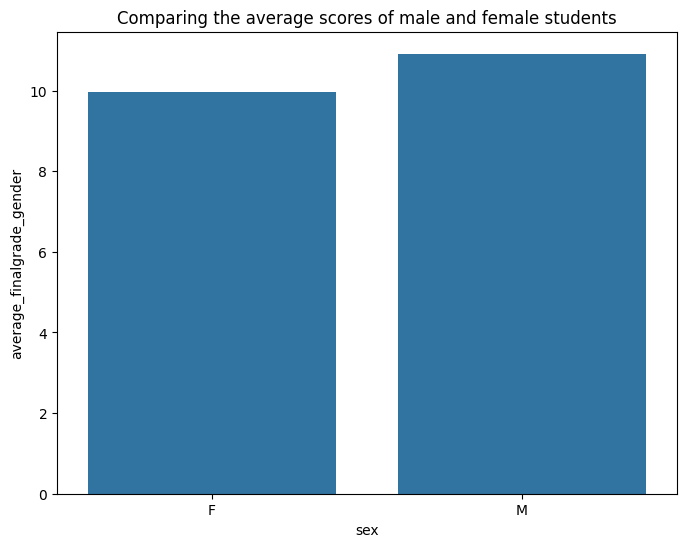

In [194]:
# 3.Bar chart comparing the average scores of male and female students
plt.figure(figsize=(8,6))
sns.barplot(x=average_finalgrade_gender.index, y=average_finalgrade_gender.values)
plt.title("Comparing the average scores of male and female students")
plt.xlabel('sex')
plt.ylabel('average_finalgrade_gender')
plt.show()